# Load packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Runtimes of benchmark queries on Postgres

In [ ]:
# Run times are listed as the sequence of ssb, tpch and imdb.

# baseline
PG = [0.34, 0.33, 0.32, 0.51, 0.45, 0.34, 0.34, 0.48, 0.33, 0.30, 0.53, 0.51, 0.36,
     1.17, 1.41, 1.78, 0.95, 0.35, 0.38, 0.37, 1.38, 7.85, 0.45,
     0.56, 1.05, 1.37, 5.05, 3.70]

# postgres with ML predicted plan
PG_our = [0.34, 0.33, 0.32, 0.51, 0.45, 0.32, 0.48, 0.33, 0.28, 0.30, 0.53, 0.56, 0.44, 
         1.28, 1.01, 1.47, 1.09, 0.35, 0.38, 0.43, 1.38, 8.26, 0.45,
         1.19, 2.47, 1.89, 4.97, 3.67]

# Plot figure

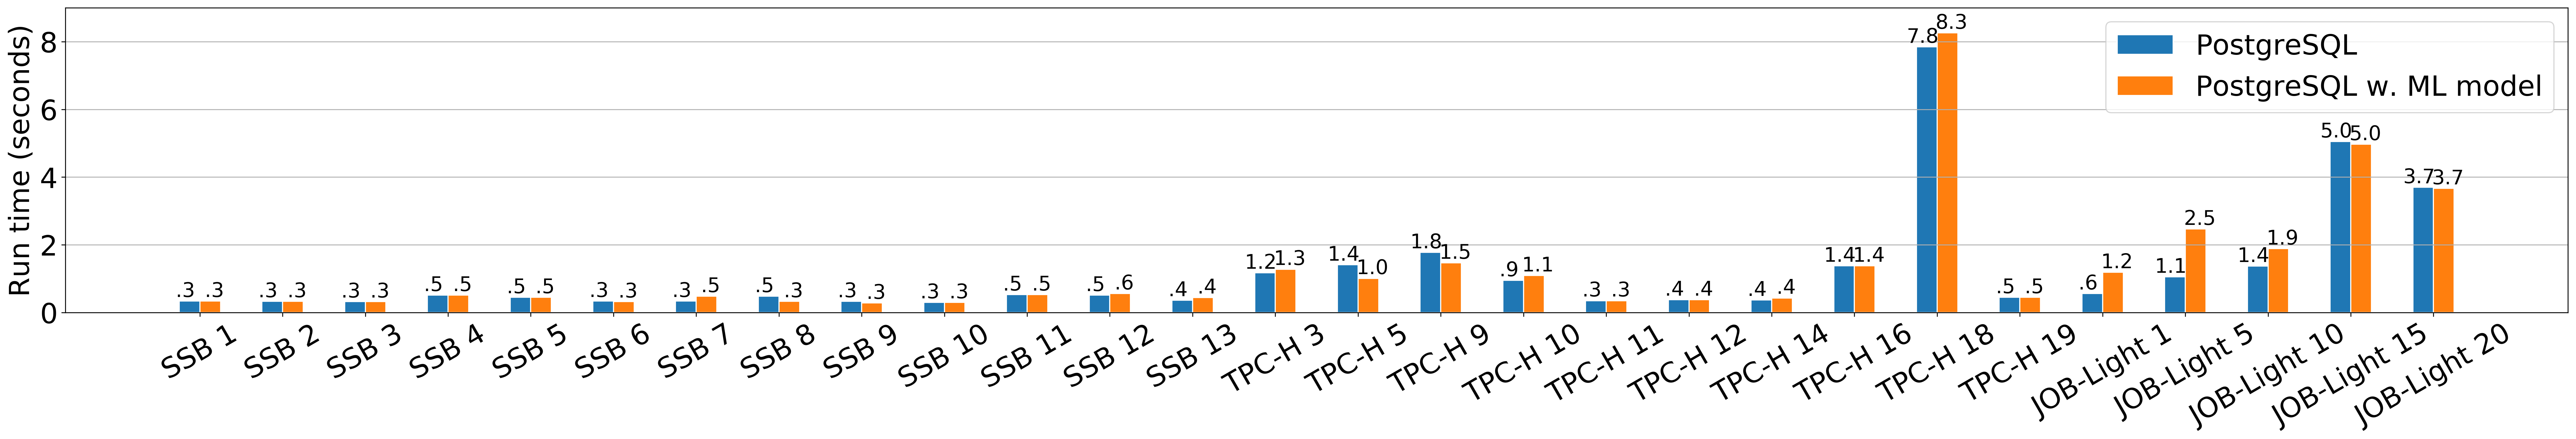

In [10]:


# SetPlotRC()
# set width of bar
barWidth = 0.25




ssb = [i for i in range(13)]
tpch = [13 + i for i in range(10)]
job = [10 + 13 + i for i in range(5)]
 
# Set position of bar on X axis
r1 = [i for i in range(28)]
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(40, 5), dpi=300)

axes = plt.gca()
axes.set_ylim([0, 9])
plt.grid(axis='y')

# Make the plot
bar1 = plt.bar(r1, PG, color='tab:blue', width=barWidth, edgecolor='white', label='PostgreSQL')
bar2 = plt.bar(r2, PG_our, color='tab:orange', width=barWidth, edgecolor='white', label='PostgreSQL w. ML model')


# Input data labels
for rect in bar1:
    height = rect.get_height()
    num = '%.1f' % height
    num = num.replace('0.', '.')
    if int(height) < 10:
        plt.text(rect.get_x() + rect.get_width()/2.0 -0.2*barWidth, height, num, ha='center', va='bottom', fontsize=18)

for idx, rect in enumerate(bar2):
    height = rect.get_height()
    num = '%.1f' % height
    num = num.replace('0.', '.')
    plt.text(rect.get_x() + rect.get_width()/2.0+0.2*barWidth, height, num, ha='center', va='bottom', fontsize=18)

    

ticks = [f'SSB {i+1}' for i in range(13)] + [f'TPC-H {i}' for i in [3, 5, 9, 10, 11, 12, 14, 16, 18, 19]] + ['JOB-Light 1', 'JOB-Light 5', 'JOB-Light 10', 'JOB-Light 15', 'JOB-Light 20']
plt.xticks([r + 0.5*barWidth for r in r1], ticks, rotation = 30)
axes.tick_params(axis='x', which='major', labelsize=25)
axes.tick_params(axis='y', which='major', labelsize=25)

# Create legend & Show graphic
plt.ylabel('Run time (seconds)' , fontsize=25)
plt.legend(prop={'size': 25})
plt.savefig(f'./figures/exp1-generalize-model.pdf', bbox_inches = 'tight',pad_inches = 0)
plt.show()